<img src="https://webna.ir/wp-content/uploads/2018/08/%D9%85%DA%A9%D8%AA%D8%A8-%D8%AE%D9%88%D9%86%D9%87.png" width=50% />

<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center">Mini Project1</h3>
</div>

<img src = "https://www.cyclonis.com/images/2020/03/googleplay.jpg" width=50%>

## Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load and Prepare Data

In [ ]:
df = pd.read_csv("googleplaystore.csv")

In [8]:
df.shape

(10841, 13)

In [33]:
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,10000.0,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000.0,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,50000000.0,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [102]:
df.dtypes

App                          object
Category                     object
Rating                      float64
Reviews                     float64
Size                         object
Installs                    float64
Type                         object
Price                       float64
Content Rating               object
Genres                       object
Last Updated         datetime64[ns]
Current Ver                  object
Android Ver                  object
days_since_update           float64
recency_bin                category
dtype: object

In [39]:
df.describe(include='all')


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,9660,9660,8196.000000,9.659000e+03,8430.0,9.659000e+03,9659,9659.000000,9659,9660,9659,9652,9657
unique,9660,34,NaN,NaN,459.0,NaN,3,NaN,6,119,NaN,2819,33
top,Life Made WI-Fi Touchscreen Photo Frame,FAMILY,NaN,NaN,11.0,NaN,Free,NaN,Everyone,Tools,NaN,Varies with device,4.1 and up
freq,1,1875,NaN,NaN,182.0,NaN,8904,NaN,7903,828,NaN,1056,2205
mean,NaN,NaN,4.173292,2.167244e+05,NaN,7.797229e+06,NaN,1.097231,NaN,NaN,2017-10-31 02:10:53.732270336,NaN,NaN
min,NaN,NaN,1.000000,0.000000e+00,NaN,0.000000e+00,NaN,0.000000,NaN,NaN,2010-05-21 00:00:00,NaN,NaN
25%,NaN,NaN,4.000000,2.500000e+01,NaN,1.000000e+03,NaN,0.000000,NaN,NaN,2017-08-07 00:00:00,NaN,NaN
50%,NaN,NaN,4.300000,9.690000e+02,NaN,1.000000e+05,NaN,0.000000,NaN,NaN,2018-05-05 00:00:00,NaN,NaN
75%,NaN,NaN,4.500000,2.944050e+04,NaN,1.000000e+06,NaN,0.000000,NaN,NaN,2018-07-17 00:00:00,NaN,NaN
max,NaN,NaN,5.000000,7.812821e+07,NaN,1.000000e+09,NaN,400.000000,NaN,NaN,2018-08-08 00:00:00,NaN,NaN


In [17]:
# Reviews
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

# Installs
df['Installs'] = df['Installs'].str.replace('[+,]', '', regex=True)
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')


# Price
df['Price'] = df['Price'].str.replace('[$]', '', regex=True)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

#Last Updated
df['Last Updated'] = pd.to_datetime(df["Last Updated"], errors='coerce')

In [19]:
df.loc[df['Rating'] > 5, 'Rating'] = np.nan


In [28]:
def parse_size(value):
    if pd.isna(value):
        return np.nan
    if isinstance(value, str):
        value = value.strip()
        if value.endswith('M'):
            return float(value[:-1])
        elif value.endswith('k'):
            return float(value[:-1]) / 1024
        else:
            return np.nan
    else:
        return value

df.loc[:, 'Size'] = df['Size'].apply(parse_size)


In [34]:
#حذف اپ های تکراری
df = df.sort_values('Last Updated').drop_duplicates(subset='App', keep='last')


In [51]:
missing = df.isna().mean().sort_values(ascending=False)  
display(missing)


Rating            0.151553
Size              0.127329
Current Ver       0.000828
Android Ver       0.000311
Reviews           0.000104
Content Rating    0.000104
Price             0.000104
Installs          0.000104
Type              0.000104
Last Updated      0.000104
App               0.000000
Category          0.000000
Genres            0.000000
dtype: float64

## EDA

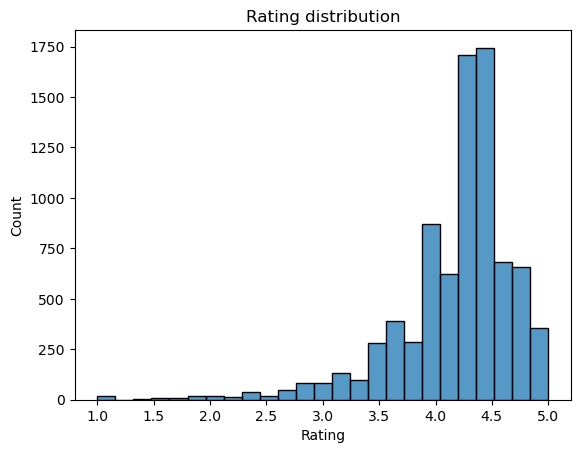

In [69]:
plt.figure()
sns.histplot(df['Rating'].dropna(), bins=25, kde=False)
plt.title("Rating distribution")
plt.show()


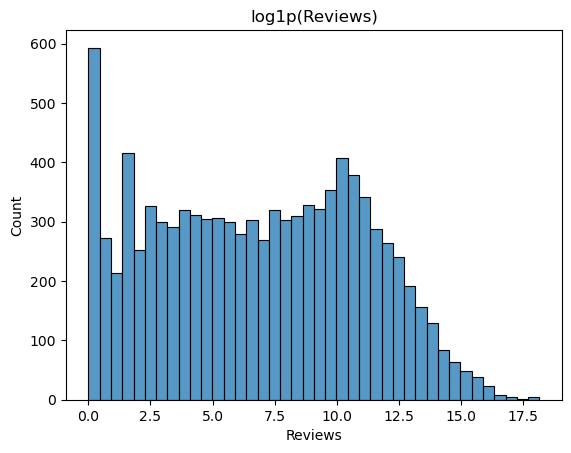

In [64]:
plt.figure()
sns.histplot(np.log1p(df['Reviews'].dropna()), bins=40)
plt.title("log1p(Reviews)")
plt.show()

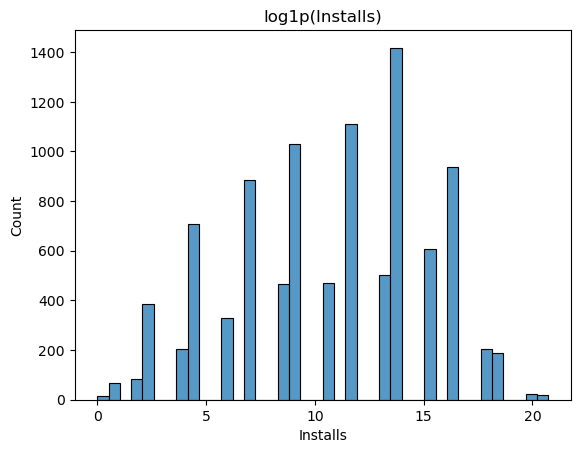

In [75]:
plt.figure()
sns.histplot(np.log1p(df['Installs'].dropna()), bins=40)
plt.title("log1p(Installs)")
plt.show()

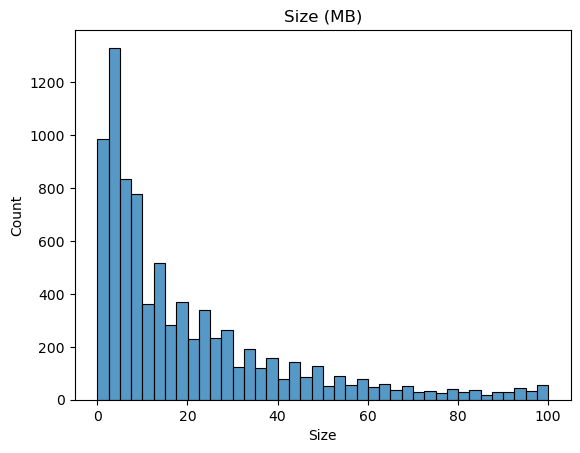

In [76]:
plt.figure()
sns.histplot(df['Size'].dropna(), bins=40)
plt.title("Size (MB)")
plt.show()

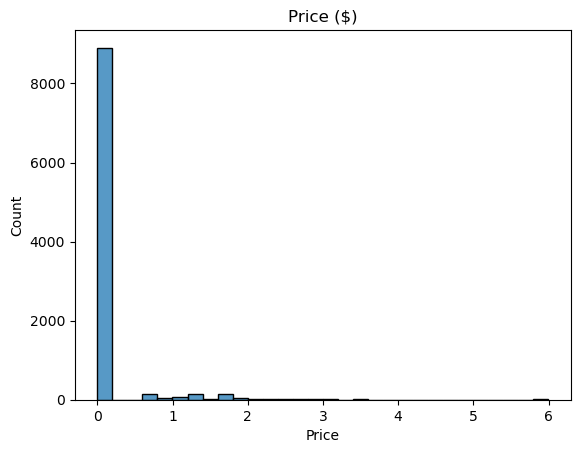

In [81]:
plt.figure()
sns.histplot(np.log1p(df['Price'].dropna()), bins=30)
plt.title("Price ($)")
plt.show()

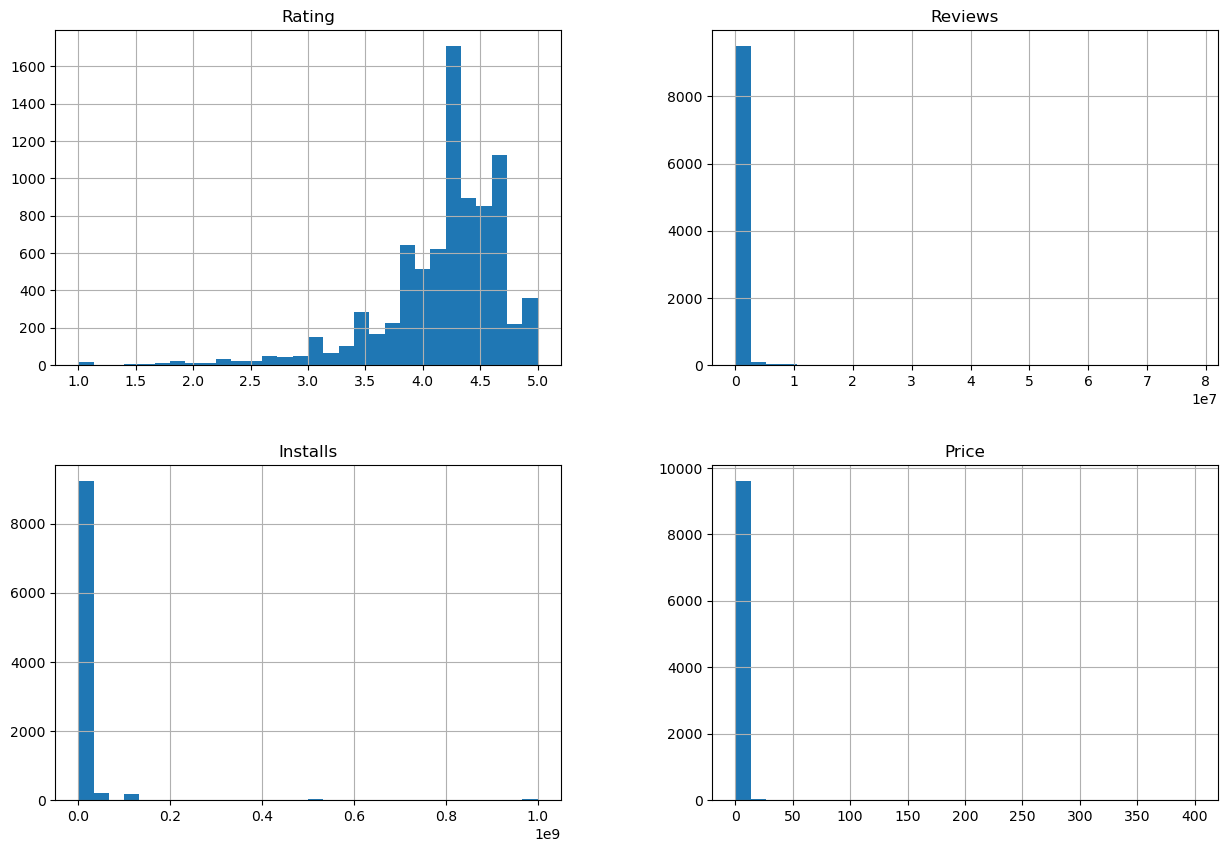

In [82]:
df[['Rating','Reviews','Size','Installs','Price']].hist(bins=30, figsize=(15,10))
plt.show()


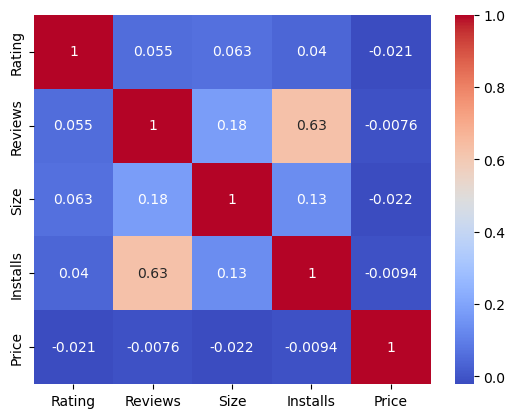

In [93]:
sns.heatmap(df[['Rating','Reviews','Size','Installs','Price']].corr(), annot=True, cmap="coolwarm")
plt.show()



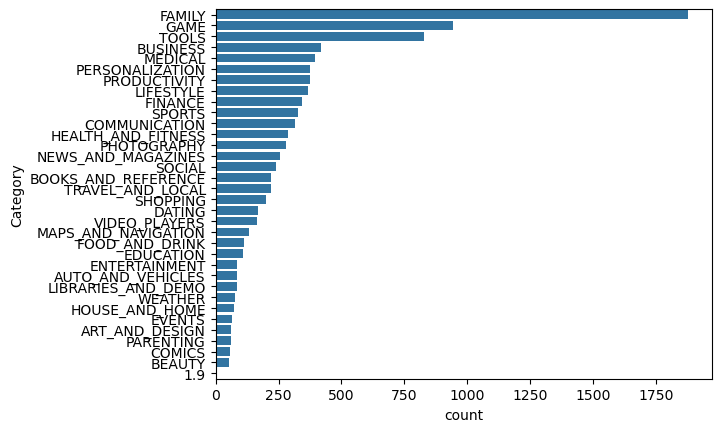

In [84]:
sns.countplot(y='Category', data=df, order=df['Category'].value_counts().index)
plt.show()


## Data Preprocessing

## Strorytelling - Visualization

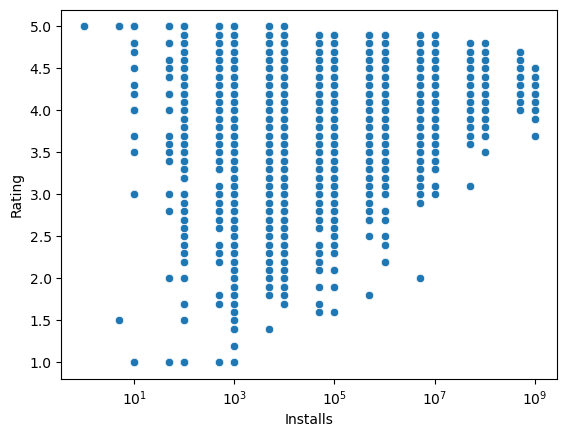

In [104]:
sns.scatterplot(x='Installs', y='Rating', data=df)
plt.xscale('log')
plt.show()

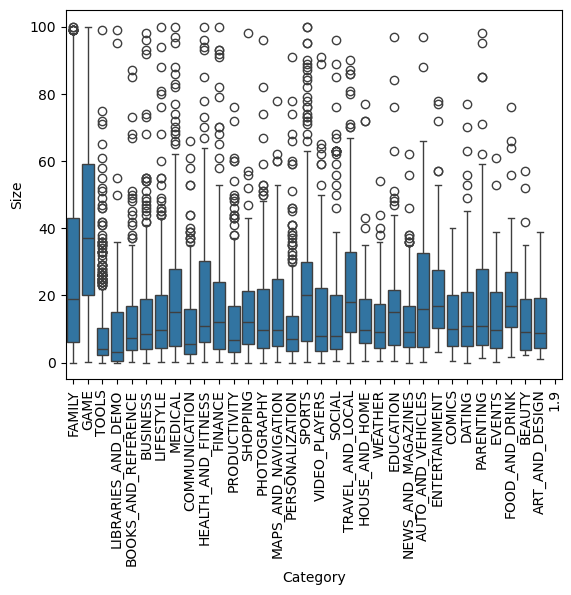

In [90]:
sns.boxplot(x='Category', y='Size', data=df)
plt.xticks(rotation=90)
plt.show()


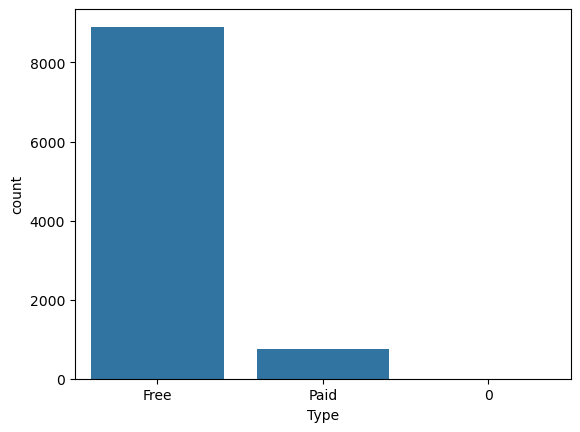

In [91]:
sns.countplot(x='Type', data=df)
plt.show()


In [97]:
# اپ‌هایی با installs بالا ولی rating پایین
suspicious = df[(df['Installs'] > df['Installs'].quantile(0.95)) & (df['Rating'] < 3.0)]
display(suspicious[['App','Category','Rating','Installs','Reviews']].sort_values('Installs', ascending=False).head(30))

# اپ‌هایی با reviews بسیار بالا ولی rating پایین
high_reviews_low_rating = df[(df['Reviews'] > df['Reviews'].quantile(0.99)) & (df['Rating'] < 4.0)]
display(high_reviews_low_rating[['App','Rating','Reviews','Installs']])


,App,Category,Rating,Installs,Reviews


,App,Rating,Reviews,Installs
6373,VK,3.8,5793284.0,100000000.0


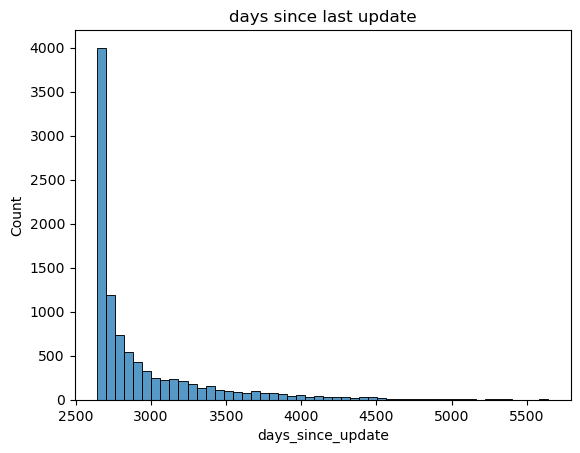

C:\Users\Dastjerdi\AppData\Local\Temp\ipykernel_10404\1996421749.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('recency_bin')['Rating'].median()


recency_bin
<1m      NaN
1-6m     NaN
6-12m    NaN
1-2y     NaN
>2y      4.3
Name: Rating, dtype: float64

In [98]:
# روز از آخرین آپدیت (days_since_update)
today = pd.Timestamp('now')
df['days_since_update'] = (today - df['Last Updated']).dt.days

# distribution days_since_update
plt.figure()
sns.histplot(df['days_since_update'].dropna(), bins=50)
plt.title("days since last update")
plt.show()

# median rating by recency bucket
df['recency_bin'] = pd.cut(df['days_since_update'], bins=[-1,30,180,365,365*2,10000], labels=['<1m','1-6m','6-12m','1-2y','>2y'])
df.groupby('recency_bin')['Rating'].median()


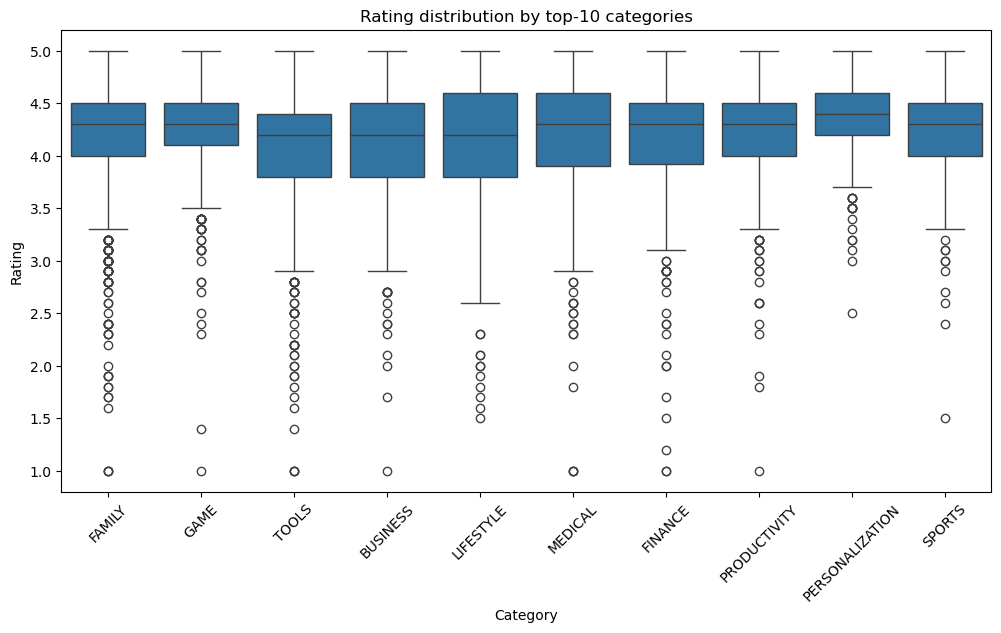

In [99]:
# Boxplot rating per top 10 categories
top10 = df['Category'].value_counts().head(10).index
plt.figure(figsize=(12,6))
sns.boxplot(data=df[df['Category'].isin(top10)], x='Category', y='Rating')
plt.xticks(rotation=45)
plt.title("Rating distribution by top-10 categories")
plt.show()


## Send us the Result (Maktabkhoone)